In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('DowJonesIndex.csv')

In [4]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [5]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [6]:
df.shape

(750, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_divi

In [8]:
#Check the null values in dataset
df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [9]:
#Lets fill the missing values
df['percent_change_volume_over_last_wk'].fillna('Missing', inplace=True)  
df['previous_weeks_volume'].fillna('Missing', inplace=True) 

In [10]:
#Lets check the missing values again
df.isnull().sum()

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

AS we see there is no missing value in the dataset

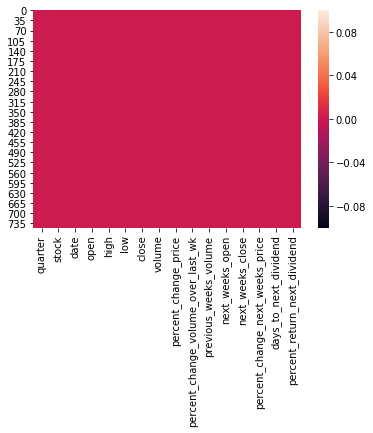

In [11]:
#Lets do the heatmap on dataset
sns.heatmap(df.isnull())

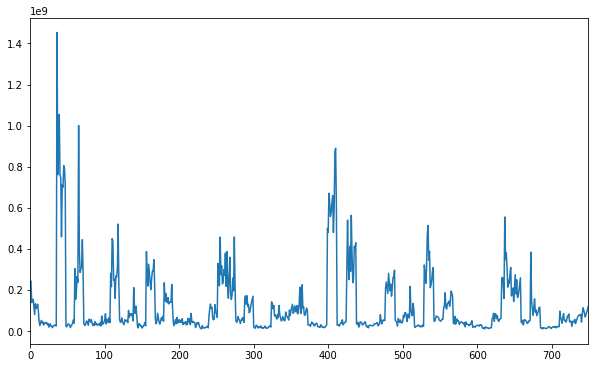

In [12]:
#Lets plot the graph of stocks
df['volume'].plot(figsize=(10,6))

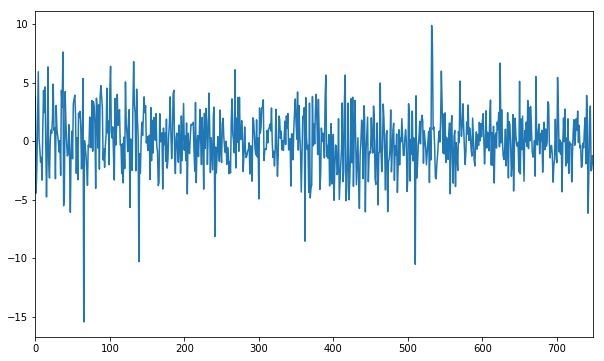

In [13]:
#Lets plot the graph of stocks
df['percent_change_price'].plot(figsize=(10,6))

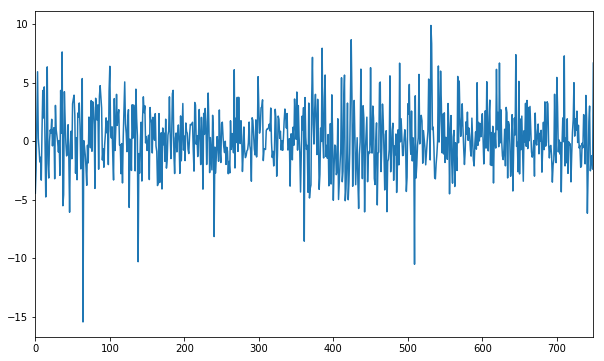

In [14]:
df['percent_change_next_weeks_price'].plot(figsize=(10,6))

In [15]:
#Lets clean the dataset 
%timeit df.open.str.replace('$','')

561 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit df.close.str.replace('$','')

609 µs ± 49.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%timeit df.high.str.replace('$','')

592 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%timeit df.low.str.replace('$','')

642 µs ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
#Lets see the dataset
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,Missing,Missing,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.38022,2.39656e+08,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.025,2.42963e+08,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.3555,1.38428e+08,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.98745,1.51379e+08,$17.33,$17.37,0.230814,97,0.175029


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    750 non-null object
previous_weeks_volume                 750 non-null object
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_divide

In [21]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk     object
previous_weeks_volume                  object
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [22]:
# convert column of a dataframe
df.open.str.split('-').str[0][0]

'$15.82'

In [25]:
df['open']=df['open'].apply(lambda x:x.split('$')[1])

In [26]:
df['open'].apply(lambda x:x.replace('$',''))

0      15.82
1      16.71
2      16.19
3      15.87
4      16.18
5      17.33
6      17.39
7      16.98
8      16.81
9      16.58
10     15.95
11     16.38
12     43.30
13     44.20
14     46.03
15     46.05
16     44.13
17     43.96
18     46.42
19     44.94
20     43.73
21     43.86
22     43.86
23     44.75
24     66.15
25     69.42
26     70.86
27     71.52
28     69.26
29     71.43
       ...  
720    36.91
721    35.57
722    35.23
723    35.35
724    52.31
725    52.31
726    52.54
727    53.08
728    53.60
729    55.08
730    54.97
731    55.61
732    54.90
733    54.88
734    53.86
735    52.91
736    52.70
737    83.86
738    84.26
739    85.95
740    83.11
741    86.29
742    88.10
743    83.01
744    80.22
745    80.22
746    83.28
747    80.93
748    80.00
749    78.65
Name: open, Length: 750, dtype: object

In [27]:
df['close']=df['close'].apply(lambda x:x.split('$')[1])

In [28]:
df['close'].apply(lambda x:x.replace('$',''))

0      16.42
1      15.97
2      15.79
3      16.13
4      17.14
5      17.37
6      17.28
7      16.68
8      16.58
9      16.03
10     16.11
11     17.09
12     44.36
13     46.25
14     46.00
15     43.86
16     43.82
17     46.75
18     45.53
19     43.53
20     43.72
21     44.28
22     44.17
23     45.59
24     69.38
25     70.07
26     71.68
27     69.23
28     71.38
29     72.14
       ...  
720    35.63
721    35.19
722    35.51
723    36.00
724    52.13
725    52.54
726    53.55
727    53.58
728    54.98
729    55.02
730    55.72
731    55.29
732    54.70
733    53.66
734    52.72
735    52.82
736    52.41
737    84.68
738    85.95
739    84.29
740    86.36
741    87.98
742    82.69
743    80.87
744    81.57
745    82.63
746    81.18
747    79.78
748    79.02
749    76.78
Name: close, Length: 750, dtype: object

In [32]:
df['high']=df['high'].apply(lambda x:x.split('$')[1])

In [33]:
df['high'].apply(lambda x:x.replace('$',''))

0      16.72
1      16.71
2      16.38
3      16.63
4      17.39
5      17.48
6      17.68
7      17.15
8      16.94
9      16.75
10     16.33
11     17.24
12     45.60
13     46.25
14     46.71
15     46.27
16     44.23
17     46.79
18     46.93
19     45.12
20     44.68
21     45.54
22     44.47
23     45.61
24     70.10
25     70.50
26     72.99
27     72.82
28     71.64
29     72.99
       ...  
720    36.99
721    36.14
722    35.92
723    36.17
724    52.74
725    53.24
726    53.96
727    53.95
728    55.16
729    55.79
730    56.03
731    56.47
732    55.50
733    55.22
734    54.30
735    53.29
736    53.70
737    84.94
738    86.22
739    86.15
740    86.36
741    88.00
742    88.13
743    83.76
744    82.58
745    82.63
746    83.75
747    81.87
748    80.82
749    81.12
Name: high, Length: 750, dtype: object

In [34]:
df['low']=df['low'].apply(lambda x:x.split('$')[1])

In [35]:
df['low'].apply(lambda x:x.replace('$',''))

0      15.78
1      15.64
2      15.60
3      15.82
4      16.18
5      16.97
6      17.28
7      15.96
8      16.13
9      15.42
10     15.43
11     16.26
12     43.11
13     44.01
14     44.71
15     43.42
16     43.15
17     43.88
18     45.53
19     43.01
20     42.75
21     43.53
22     42.19
23     44.10
24     66.00
25     68.35
26     70.23
27     69.00
28     69.12
29     71.15
       ...  
720    35.60
721    35.16
722    34.94
723    35.20
724    51.89
725    52.06
726    52.40
727    52.91
728    53.23
729    53.20
730    54.70
731    54.95
732    54.10
733    53.04
734    52.69
735    51.79
736    52.35
737    82.61
738    84.07
739    82.38
740    82.44
741    85.89
742    81.59
743    79.42
744    79.60
745    80.07
746    80.18
747    79.72
748    78.33
749    76.78
Name: low, Length: 750, dtype: object

In [36]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,Missing,Missing,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.38022,2.39656e+08,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.025,2.42963e+08,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.3555,1.38428e+08,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.98745,1.51379e+08,$17.33,$17.37,0.230814,97,0.175029


In [37]:
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk     object
previous_weeks_volume                  object
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [38]:
#convert column of a dataframe
df['open']=df['open'].replace(',','').astype(float)

In [41]:
df['close']=df['close'].replace(',','').astype(float)

In [42]:
df['high']=df['high'].replace(',','').astype(float)

In [43]:
df['low']=df['low'].replace(',','').astype(float)

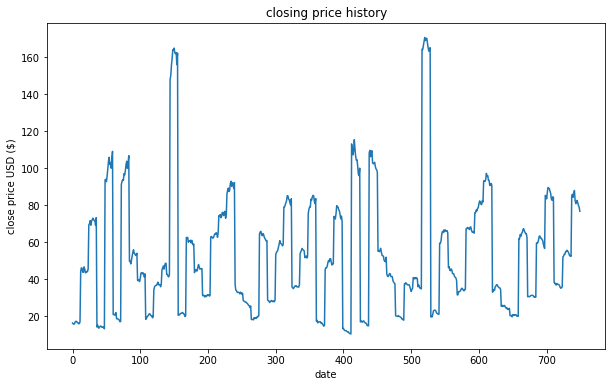

In [53]:
#Lets visualize the closing price history
plt.figure(figsize=(10,6))
plt.title('closing price history')
plt.plot(df['close'])
plt.xlabel('date',fontsize=10)
plt.ylabel('close price USD ($)', fontsize=10)
plt.show()

In [54]:
df.describe

<bound method NDFrame.describe of      quarter stock       date   open   high    low  close     volume  \
0          1    AA   1/7/2011  15.82  16.72  15.78  16.42  239655616   
1          1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761   
5          1    AA  2/11/2011  17.33  17.48  16.97  17.37  114691279   
6          1    AA  2/18/2011  17.39  17.68  17.28  17.28   80023895   
7          1    AA  2/25/2011  16.98  17.15  15.96  16.68  132981863   
8          1    AA   3/4/2011  16.81  16.94  16.13  16.58  109493077   
9          1    AA  3/11/2011  16.58  16.75  15.42  16.03  114332562   
10         1    AA  3/18/2011  15.95  16.33  15.43  16.11  130374108   
11         1    AA  3/25/2011  16.38  17.24  16.26  17.09   95550392   
12         1   AXP   1/7/2011 

In [56]:
import math
#Create the dataframe with only close column
data=df.filter(['close'])
#convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

600

In [59]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[3.68611771e-02],
       [3.40497314e-02],
       [3.29251531e-02],
       [3.50493565e-02],
       [4.13594902e-02],
       [4.27964513e-02],
       [4.22341622e-02],
       [3.84855679e-02],
       [3.78608022e-02],
       [3.44245908e-02],
       [3.49244033e-02],
       [4.10471073e-02],
       [2.11420717e-01],
       [2.23228789e-01],
       [2.21666875e-01],
       [2.08296889e-01],
       [2.08046982e-01],
       [2.26352618e-01],
       [2.18730476e-01],
       [2.06235162e-01],
       [2.07422217e-01],
       [2.10920905e-01],
       [2.10233662e-01],
       [2.19105335e-01],
       [3.67737099e-01],
       [3.72047982e-01],
       [3.82106710e-01],
       [3.66799950e-01],
       [3.80232413e-01],
       [3.84980632e-01],
       [3.90603524e-01],
       [3.85980257e-01],
       [3.82856429e-01],
       [3.81856804e-01],
       [3.65987755e-01],
       [3.92477821e-01],
       [2.33037611e-02],
       [2.95514182e-02],
       [2.33037611e-02],
       [1.92427840e-02],


In [60]:
#Create the training dataset 
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03686118, 0.03404973, 0.03292515, 0.03504936, 0.04135949,
       0.04279645, 0.04223416, 0.03848557, 0.0378608 , 0.03442459,
       0.0349244 , 0.04104711, 0.21142072, 0.22322879, 0.22166687,
       0.20829689, 0.20804698, 0.22635262, 0.21873048, 0.20623516,
       0.20742222, 0.2109209 , 0.21023366, 0.21910534, 0.3677371 ,
       0.37204798, 0.38210671, 0.36679995, 0.38023241, 0.38498063,
       0.39060352, 0.38598026, 0.38285643, 0.3818568 , 0.36598775,
       0.39247782, 0.02330376, 0.02955142, 0.02330376, 0.01924278,
       0.02355367, 0.02655254, 0.02642759, 0.02299138, 0.02249157,
       0.02411596, 0.02199175, 0.01761839, 0.51986755, 0.52161689,
       0.51374485, 0.53205048, 0.55647882, 0.58115707, 0.59565163,
       0.57153567, 0.57803324, 0.55916531, 0.5906535 , 0.61583156])]
[0.06528801699362739]



In [61]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [64]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(540, 60, 1)

In [74]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [77]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

540/540 [==============================] - 17s 24ms/step - loss: 0.0359


In [79]:
#create the testing data
#create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60: :]
#Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [80]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [81]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [83]:
#Get the models predicted price values 
predictions  = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [84]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

6.290563079833984

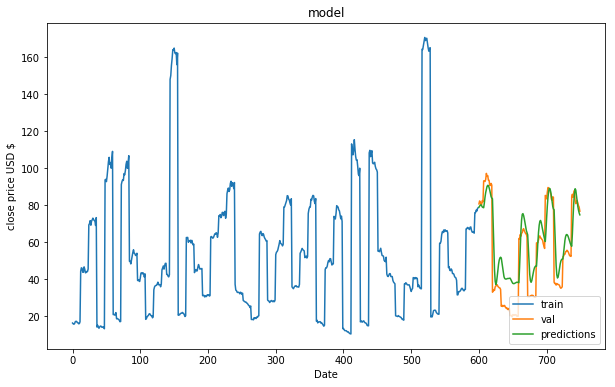

In [86]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the data
plt.figure(figsize=(10,6))
plt.title('model')
plt.xlabel('Date',fontsize=10)
plt.ylabel('close price USD $', fontsize=10)
plt.plot(train['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['train','val','predictions'], loc='lower right')
plt.show()

In [87]:
#show the valid and predicted price
valid

,close,predictions
600,80.74,78.924576
601,82.33,79.517593
602,81.62,80.101120
603,80.54,80.237656
604,80.36,79.779892
605,82.52,79.044701
606,81.84,78.814651
607,93.13,78.672325
608,93.22,81.252251
609,92.82,84.397079


In [ ]:
#Get the quote
